###Analisis Exploratorio con Python


---

Importamos las librerias que vamos a necesitar


In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
from scipy.stats import skew, kurtosis
import folium

Importacion de data directamente desde el link debido a que esta informacion va actualizandose cada día y entonces asi cada que se corra el notebook tendremos la informacion mas actual del dataset en cuestion.

In [2]:
overall ="https://greenwichhr-covidjobimpacts.s3.us-east-2.amazonaws.com/overall.csv.part_00000"
industry ="https://greenwichhr-covidjobimpacts.s3.us-east-2.amazonaws.com/industry.csv.part_00000"
industry_job_family ="https://greenwichhr-covidjobimpacts.s3.us-east-2.amazonaws.com/industry_job_family.csv.part_00000"
geography = "https://greenwichhr-covidjobimpacts.s3.us-east-2.amazonaws.com/geography.csv.part_00000"
geography_industry= "https://greenwichhr-covidjobimpacts.s3.us-east-2.amazonaws.com/geography_industry.csv.part_00000"
job_family="https://greenwichhr-covidjobimpacts.s3.us-east-2.amazonaws.com/job_family.csv.part_00000"
job_family_role= "https://greenwichhr-covidjobimpacts.s3.us-east-2.amazonaws.com/job_family_role.csv.part_00000"

In [3]:
df_overall= pd.read_csv(overall)
df_industry= pd.read_csv(industry)
df_industry_job_family= pd.read_csv(industry_job_family)
df_geography= pd.read_csv(geography, encoding ="iso-8859-1")
df_geography_industry= pd.read_csv(geography_industry, encoding ="iso-8859-1")
df_job_family= pd.read_csv(job_family)
df_job_family_role= pd.read_csv(job_family_role)

Tablas cargadas correctamente 

Overall tiene la fecha hasta el día de ayer y el indice de impacto

In [4]:
df_overall.head()

,post_date,count_id_indexed
0,2020-03-01,1.0000
1,2020-03-02,1.0100
2,2020-03-03,1.0223
3,2020-03-04,1.0461
4,2020-03-05,1.0582


In [5]:
df_overall.tail()

,post_date,count_id_indexed
525,2021-08-08,3.0188
526,2021-08-09,2.6939
527,2021-08-10,1.9805
528,2021-08-11,1.9027
529,2021-08-12,1.9254


Industry tiene la fecha hasta el día de ayer, el indice de impacto y la industria en relacion 

In [6]:
df_industry.head()

,post_date,industry,count_id_indexed
0,2020-03-01,NaN,1.0
1,2020-03-01,Communication,1.0
2,2020-03-01,Construction,1.0
3,2020-03-01,Energy,1.0
4,2020-03-01,Entertainment,1.0


In [7]:
df_industry.tail()

,post_date,industry,count_id_indexed
8475,2021-08-12,Real Estate,1.7535
8476,2021-08-12,Retail,2.1368
8477,2021-08-12,Services,2.0680
8478,2021-08-12,Transportation,1.2628
8479,2021-08-12,Wholesale,2.3533


Industry_job_family tiene la fecha hasta el día de ayer, el indice de impacto, la familia de la industria y la industria en relacion

In [8]:
df_industry_job_family.head()

,post_date,industry,job_family,count_id_indexed
0,2020-03-01,NaN,NaN,1.0
1,2020-03-01,NaN,Customer Service,1.0
2,2020-03-01,NaN,Entertainment and Recreation,1.0
3,2020-03-01,NaN,Facilities/Constr,1.0
4,2020-03-01,NaN,Finance/Insurance,1.0


In [9]:
df_industry_job_family.tail()

,post_date,industry,job_family,count_id_indexed
152912,2021-08-12,Wholesale,Sales,6.8913
152913,2021-08-12,Wholesale,Security,14.2699
152914,2021-08-12,Wholesale,Skilled Trades,4.3840
152915,2021-08-12,Wholesale,Supply Chain Staff,4.0010
152916,2021-08-12,Wholesale,Unassigned,0.9087


Job_family tiene la fecha hasta el día de ayer, el indice de impacto y la familia de la industria





In [10]:
df_job_family.head()

,post_date,job_family,count_id_indexed
0,2020-03-01,NaN,1.0
1,2020-03-01,Customer Service,1.0
2,2020-03-01,Entertainment and Recreation,1.0
3,2020-03-01,Facilities/Constr,1.0
4,2020-03-01,Finance/Insurance,1.0


In [11]:
df_job_family.tail()

,post_date,job_family,count_id_indexed
10065,2021-08-12,Sales,7.1790
10066,2021-08-12,Security,2.3269
10067,2021-08-12,Skilled Trades,3.1187
10068,2021-08-12,Supply Chain Staff,2.6363
10069,2021-08-12,Unassigned,0.6760


Job_family_role tiene la fecha hasta el día de ayer, el indice de impacto, la familia de la industria y el rol de trabajo en cuestion





In [12]:
df_job_family_role.head()

,post_date,job_family,role,count_id_indexed
0,2020-03-01,NaN,EXCUDE,1.0000
1,2020-03-01,Customer Service,Call Center Manager,1.0000
2,2020-03-01,Customer Service,Customer Service Manager,1.0000
3,2020-03-01,Customer Service,Customer Service Representative,1.0000
4,2020-03-01,Customer Service,Customer Support Representative,1.0000


In [13]:
df_job_family_role.tail()

,post_date,job_family,role,count_id_indexed
588837,2021-08-12,Unassigned,Regulatory Affairs/Reporting Specialist,28.3471
588838,2021-08-12,Unassigned,Shift Manager,2.6010
588839,2021-08-12,Unassigned,Strategist,0.7651
588840,2021-08-12,Unassigned,Team Member,0.0429
588841,2021-08-12,Unassigned,Vice president,0.9034


Geography tiene la fecha hasta el día de ayer, el indice de impacto, estado de EUA al cual se refiere este impacto


In [14]:
df_geography.head(60)

,post_date,state,count_id_indexed
0,2020-03-01,NaN,1.0000
1,2020-03-01,AK,1.0000
2,2020-03-01,AL,1.0000
3,2020-03-01,AR,1.0000
4,2020-03-01,AZ,1.0000
5,2020-03-01,CA,1.0000
6,2020-03-01,CO,1.0000
7,2020-03-01,CT,1.0000
8,2020-03-01,DC,1.0000
9,2020-03-01,DE,1.0000


In [15]:
df_geography.tail(60)

,post_date,state,count_id_indexed
31899,2021-08-11,WY,1.8668
31900,2021-08-12,NaN,25.6239
31901,2021-08-12,AK,1.7972
31902,2021-08-12,AL,2.0153
31903,2021-08-12,AR,2.0733
31904,2021-08-12,AS,0.0000
31905,2021-08-12,AZ,1.9134
31906,2021-08-12,CA,1.4944
31907,2021-08-12,CO,1.6119
31908,2021-08-12,CT,1.7758


Geography_industry tiene la fecha hasta el día de ayer, el indice de impacto, estado de EUA al cual se refiere este impacto y la industria asociada por cada estado


In [16]:
df_geography_industry.head()

,post_date,state,industry,count_id_indexed
0,2020-03-01,NaN,NaN,1.0
1,2020-03-01,NaN,Communication,1.0
2,2020-03-01,NaN,Construction,1.0
3,2020-03-01,NaN,Energy,1.0
4,2020-03-01,NaN,Entertainment,1.0


In [17]:
df_geography_industry.tail()

,post_date,state,industry,count_id_indexed
511339,2021-08-12,WY,Real Estate,1.1429
511340,2021-08-12,WY,Retail,3.4283
511341,2021-08-12,WY,Services,1.8530
511342,2021-08-12,WY,Transportation,0.7360
511343,2021-08-12,WY,Wholesale,1.9574


In [18]:
df_overall.dtypes

post_date            object
count_id_indexed    float64
dtype: object

In [19]:
df_overall["post_date"] = pd.to_datetime(df_overall["post_date"])

In [20]:
df_overall.shape

(530, 2)

In [21]:
df_overall.isna().sum()

post_date           0
count_id_indexed    0
dtype: int64

In [22]:
df_industry["post_date"] = pd.to_datetime(df_industry["post_date"])

In [23]:
df_industry_job_family["post_date"] = pd.to_datetime(df_industry_job_family["post_date"])

In [24]:
df_job_family["post_date"] = pd.to_datetime(df_job_family["post_date"])

In [25]:
df_job_family["post_date"] = pd.to_datetime(df_job_family["post_date"])

In [26]:
df_industry.dtypes

post_date           datetime64[ns]
industry                    object
count_id_indexed           float64
dtype: object

In [27]:
df_industry.shape

(8480, 3)

In [28]:
df_industry.isna().sum()

post_date             0
industry            530
count_id_indexed      0
dtype: int64

In [29]:
df_industry_job_family.dtypes

post_date           datetime64[ns]
industry                    object
job_family                  object
count_id_indexed           float64
dtype: object

In [30]:
df_industry_job_family.shape

(152917, 4)

In [31]:
df_industry_job_family.isna().sum()

post_date               0
industry            10070
job_family           7702
count_id_indexed        0
dtype: int64

In [32]:
df_job_family.dtypes

post_date           datetime64[ns]
job_family                  object
count_id_indexed           float64
dtype: object

In [33]:
df_job_family.shape

(10070, 3)

In [34]:
df_job_family.isna().sum()

post_date             0
job_family          530
count_id_indexed      0
dtype: int64

In [35]:
df_industry.groupby("industry")["count_id_indexed"].agg(["mean", "median", "std"])

,mean,median,std
industry,,,
Communication,0.559351,0.49760,0.303032
Construction,1.137993,1.01220,0.585282
Energy,0.899677,0.80275,0.476897
Entertainment,0.655564,0.56155,0.308722
Financial Services,0.777076,0.67750,0.420962
Healthcare,1.031676,0.98830,0.425518
Hospitality,0.760318,0.55420,0.625309
Insurance,0.915301,0.89450,0.436700
Manufacturing,0.906222,0.84570,0.444562


In [36]:
df_job_family.groupby("job_family")["count_id_indexed"].agg(["mean", "median", "std"])

,mean,median,std
job_family,,,
Customer Service,0.884212,0.66645,0.795889
Entertainment and Recreation,1.162238,0.45020,3.056430
Facilities/Constr,0.900314,0.66500,1.227224
Finance/Insurance,0.760005,0.75315,0.349963
Food & Beverage,0.829544,0.75935,0.460675
Healthcare,0.715707,0.57645,0.775103
Hospitality Staff,1.151755,0.60015,2.483354
Human Resources,0.879657,0.50315,1.799608
IT,0.374600,0.24295,0.479197


In [37]:
df_industry_job_family.groupby(["job_family","industry"])["count_id_indexed"].agg(["mean", "median", "std"])

mean   median       std
job_family       industry                                       
Customer Service Communication       0.728989  0.48275  0.894939
                 Construction        0.614899  0.44450  0.542686
                 Energy              1.203264  0.59190  2.320803
                 Entertainment       0.822761  0.41410  1.166177
                 Financial Services  0.799978  0.53130  1.162231
...                                       ...      ...       ...
Unassigned       Real Estate         0.442535  0.38580  0.255402
                 Retail              0.501578  0.44425  0.297989
                 Services            0.393379  0.28950  0.295598
                 Transportation      0.358671  0.28090  0.246710
                 Wholesale           0.500834  0.41340  0.308277

[270 rows x 3 columns]

In [38]:
df_industry_job_family.groupby(["job_family","industry"])["count_id_indexed"].agg(["mean", "median", "std"]).head(20)

mean   median        std
job_family                   industry                                         
Customer Service             Communication        0.728989  0.48275   0.894939
                             Construction         0.614899  0.44450   0.542686
                             Energy               1.203264  0.59190   2.320803
                             Entertainment        0.822761  0.41410   1.166177
                             Financial Services   0.799978  0.53130   1.162231
                             Healthcare           1.532244  0.75185   3.164764
                             Hospitality          0.873058  0.39550   1.616857
                             Insurance            1.005562  0.55260   1.556883
                             Manufacturing        0.757453  0.46435   1.074585
                             Mining               0.777417  0.60330   0.566057
                             Real Estate          1.032971  0.56770   1.642214
                             Retail               0.822482  0.64135   0.740509
                             Services             1.409975  0.73180   2.653063
                             Transportation       0.806712  0.67860   0.735355
                             Wholesale            0.959493  0.64070   0.991501
Entertainment and Recreation Communication        0.487829  0.20880   1.160693
                             Construction         1.814497  0.60090   5.751609
                             Energy              10.032557  0.88890  31.022057
                             Entertainment        1.287958  0.39680   3.542361
                             Financial Services   2.656566  0.37020  10.491288

In [39]:
df_geography_mean=df_geography.groupby(["state"])["count_id_indexed"].agg(["mean", "median", "std"])

df_geography_mean.insert(2,'state',range(0,96))
df_geography_mean.insert(2,'index',range(0,96))
df_geography_mean['state'] = df_geography_mean.index
df_geography_mean.set_index('index',inplace=True)
df_geography_mean.head()

,mean,median,state,std
index,,,,
0,0.000000,0.00000,??,NaN
1,0.000000,0.00000,A,0.000000
2,0.000000,0.00000,AB,0.000000
3,1.110432,0.92295,AK,0.831218
4,1.313054,1.15210,AL,0.642281


In [40]:
sns.set_style('white')


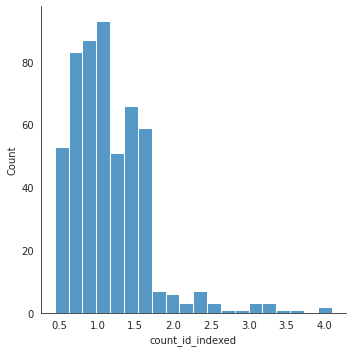

In [41]:
sns.displot(df_overall['count_id_indexed'], kde=False, bins=20);


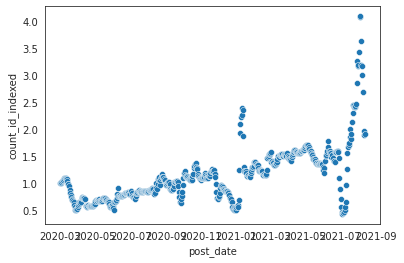

In [42]:
sns.scatterplot(x=df_overall['post_date'], y=df_overall['count_id_indexed']);


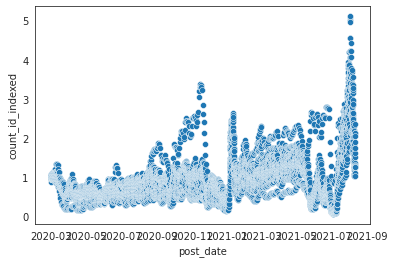

In [43]:
sns.scatterplot(x=df_industry['post_date'], y=df_industry['count_id_indexed']);


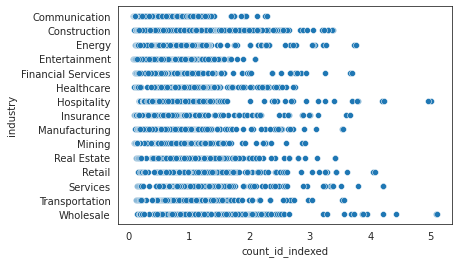

In [44]:
sns.scatterplot(x=df_industry['count_id_indexed'], y=df_industry['industry']);


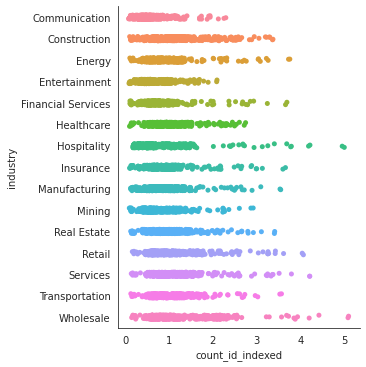

In [46]:
sns.catplot(x="count_id_indexed", y="industry", data=df_industry)


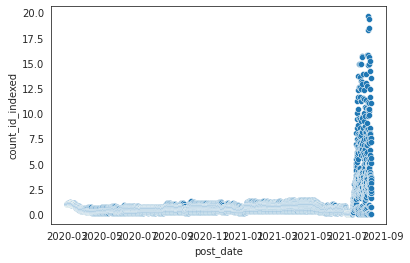

In [47]:
sns.scatterplot(x=df_job_family['post_date'], y=df_job_family['count_id_indexed']);


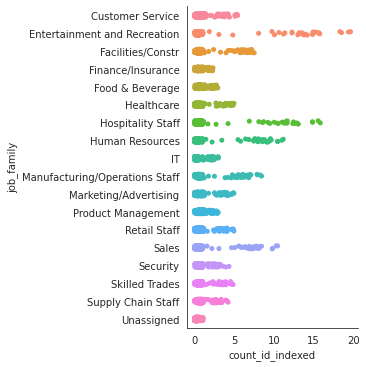

In [48]:
sns.catplot(x="count_id_indexed", y="job_family", data=df_job_family)


In [52]:
state_geo = f'/content/drive/MyDrive/BEDU/CIENCIA DE DATOS/Datasets/us_states.json'

m = folium.Map(location=[48, -102], zoom_start=3, width='60%', height='60%')

folium.Choropleth(
    geo_data=state_geo,
    name='count_id_index',
    data=df_geography_mean,
    columns=['state' ,'mean'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='mean'
).add_to(m)

folium.LayerControl().add_to(m)

m
